In [98]:
#https://quant.stackexchange.com/questions/43442/portfolio-variance-explanation-for-equation-investments-by-zvi-bodie
#https://towardsdatascience.com/efficient-frontier-in-python-detailed-tutorial-84a304f03e79
#https://www.investopedia.com/terms/e/efficientfrontier.asp
#https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
#https://medium.com/@zeng.simonl/the-efficient-frontier-in-python-a1bc9496a0a1

import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
tickers = ['AMD','MSFT','GOOG','AAPL','JPM','DAL','BLK']
data = yf.download(tickers, period='2y')['Adj Close']
rf= yf.download('^TNX',period = '10y')['Adj Close'].mean()

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  1 of 1 completed


In [110]:
class basket:
    
    def __init__(self, tickers):
        self.tickers = tickers.columns
        self.price_history = tickers
        self.returns = tickers.pct_change()
        self.sd = self.returns.std()
        self.variance = self.returns.var()
        
    def get_price_history(self,n):
        return self.price_history[-n:]
    
    def get_ticker(self):
        return self.ticker
    
    def get_return(self):
        return self.returns
    
    def get_variance(self):
        return self.variance
    
    def get_sd(self):
        return self.sd
    
    def log_returns(self):
        return np.log(self.price_history/self.price_history.shift(1))
                      
    def monte_carlo(self,n):
        portfolio_returns = []
        portfolio_volatilities = []
        for x in range(n):
            weights = np.random.random(7)
            weights /= np.sum(weights)
            log_return = self.log_returns()
            portfolio_returns.append(np.sum(weights * log_return.mean()) * 252)
            portfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_return.cov() * 252, weights))))
        return np.array(portfolio_returns),np.array(portfolio_volatilities)

In [111]:
class_data = basket(data)

In [112]:
average = class_data.returns.mean()
sd = class_data.sd
variance = class_data.variance
corr = data.corr()
covariance = class_data.log_returns().cov()*252

In [132]:
portolio_returns,portolio_volatilities = class_data.monte_carlo(1000)

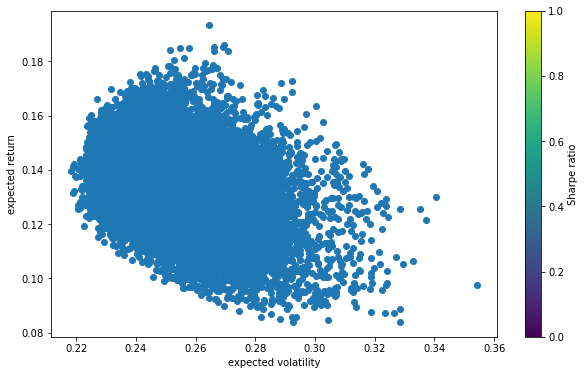

In [134]:
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_volatilities, portfolio_returns,
marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')